!pip install --user tensorflow

In [1]:
import tensorflow as tf
import keras

import pandas as pd
import numpy as np


In [2]:
df =  pd.read_csv("E:\ML\DataSets\GOOG.csv")

#type(df)
df.head()

#df.shape


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-07-11,263.103821,266.989258,261.768829,262.655518,262.655518,5699885
1,2011-07-12,263.093872,268.702850,262.017883,266.007935,266.007935,5703699
2,2011-07-13,267.497345,270.984283,267.238312,268.125000,268.125000,5601317
3,2011-07-14,268.553406,269.988007,262.381531,263.482391,263.482391,13348848
4,2011-07-15,297.634399,299.004272,292.981842,297.694183,297.694183,27567143


In [3]:
train_index = int((df.shape[0])*0.8)

train_data = df.iloc[:train_index, 1:2].values
test_data = df.iloc[train_index:, 1:2].values

#train_data.shape

___Every Data mentioned now is train_data ## training data ##___

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler(feature_range = (0,3))

scaled_data = scaler.fit_transform(train_data)

In [5]:
X_train = []
y_train = []

time_steps = 50

for i in range(time_steps,train_index):
    X_train.append(scaled_data[i-time_steps:i , 0 ])
    y_train.append(scaled_data[i, 0 ])
    
    


In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

#X_train.shape
dimension = 1

X_train = np.reshape( X_train, ( train_index-time_steps, time_steps, dimension ) )

___Preparing the ML model___

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


stock_model = Sequential()


stock_model.add(LSTM(units = 120, return_sequences = True, input_shape = (X_train.shape[1], 1)))
stock_model.add(Dropout(0.2))


stock_model.add(LSTM(units = 100, return_sequences = True))
stock_model.add(Dropout(0.15))


stock_model.add(LSTM(units = 80))
stock_model.add(Dropout(0.1))


stock_model.add(Dense (units = 1))


stock_model.compile(optimizer = "adam",  loss = "mean_squared_error")

stock_model.fit(X_train, y_train, epochs = 70, batch_size = 20)

Epoch 1/70
100/100 [==============================] - 26s 142ms/step - loss: 0.0894
Epoch 2/70
100/100 [==============================] - 15s 145ms/step - loss: 0.0157
Epoch 3/70
100/100 [==============================] - 14s 143ms/step - loss: 0.0125
Epoch 4/70
100/100 [==============================] - 14s 138ms/step - loss: 0.0147
Epoch 5/70
100/100 [==============================] - 13s 132ms/step - loss: 0.0144
Epoch 6/70
100/100 [==============================] - 14s 136ms/step - loss: 0.0117
Epoch 7/70
100/100 [==============================] - 14s 138ms/step - loss: 0.0193
Epoch 8/70
100/100 [==============================] - 13s 132ms/step - loss: 0.0136
Epoch 9/70
100/100 [==============================] - 13s 127ms/step - loss: 0.0193
Epoch 10/70
100/100 [==============================] - 13s 134ms/step - loss: 0.0103
Epoch 11/70
100/100 [==============================] - 14s 136ms/step - loss: 0.0116
Epoch 12/70
100/100 [==============================] - 13s 135ms/step - lo

____Model Trained____

In [8]:
train_frame = df.iloc[:train_index, 1:2]
test_frame = df.iloc[train_index:, 1:2]

data_frame = pd.concat((train_frame, test_frame), axis=0)

given_input = (data_frame[ len(data_frame)-len(test_frame)-time_steps: ].values).reshape(-1,1)
scaled_input = scaler.transform(given_input)

In [9]:
len(data_frame)
test_frame.shape

(508, 1)

___Generating Test Data___

In [10]:
test_index = (df.shape[0])-train_index

X_test = []
for i in range(time_steps,(time_steps+test_frame.shape[0])):
    X_test.append(scaled_input[i-time_steps : i, 0 ])

X_test = np.array(X_test)
X_test = np.reshape( X_test , (X_test.shape[0], X_test.shape[1], dimension))
X_test.shape

(508, 50, 1)

___Stock Model Prediction___

In [11]:
stock_prediction = scaler.inverse_transform(stock_model.predict(X_test))
len(stock_prediction)

508

___DATA VISUALISATION___

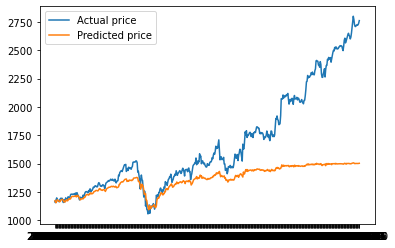

In [12]:
from matplotlib import pyplot as plt


plt.plot(df.loc[train_index : , 'Date'], test_frame.values, label="Actual price")
plt.plot(df.loc[train_index : , 'Date'], stock_prediction, label="Predicted price")
plt.legend()
plt.show()